# Breast Cancer Classification - Testing the NN's Performance

## Introduction

In this notebook, we will test the performance of a neural network in classifying breast cancer. The dataset used is the Breast Cancer Wisconsin (Diagnostic) Data Set, which we downloaded from Kaggle. The dataset contains 569 samples of malignant and benign tumor cells. 

First, we will load the dataset and preprocess it. Then, we will train a neural network using the training set and evaluate its performance using the test set. This step will be done with arbitrary hyperparameters. We will then be able to fine tune the NN to have better values. Finally, we will analyze the results and discuss the performance of the neural network.

In [1]:
# Import required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from main import train_nn, sigmoid, sigmoid_derivative, binary_cross_entropy,  binary_cross_entropy_derivative, predict, relu, relu_derivative

In [2]:
# Loading the dataset

bcdata = pd.read_csv('./datasets/breast_cancer_data.csv')


In [3]:
bcdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Before we train the neural network, we will perform some exploratory data analysis to understand the dataset better. We will also preprocess the data to make it suitable for training the neural network.

In [4]:
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are no missing values in the dataset, so we will not need to handle missing values. We will also not need to handle categorical variables, as all the features are numerical. 
But the target variable is categorical, so we will need to encode it before training the neural network.

In [5]:
print(bcdata['diagnosis'].unique())
print(bcdata.columns)
print(bcdata['diagnosis'].isnull().sum())


['M' 'B']
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
0


In [6]:
# Hot encoding the target variable

bcdata['diagnosis'] = bcdata['diagnosis'].map({'M': 1, 'B': 0})
bcdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

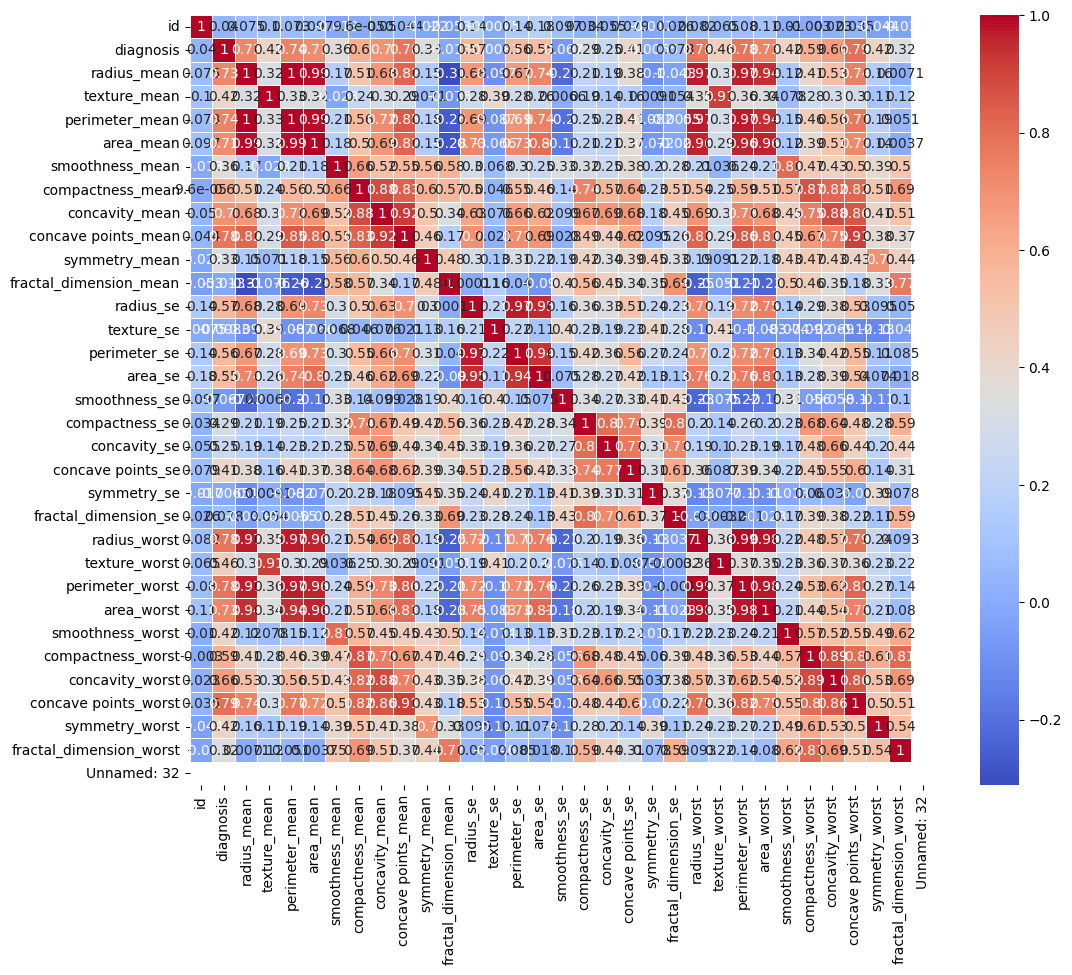

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(bcdata.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

We will create another dataset with the encoded target variable, and several features that we will use to train the neural network. 
We choose not to use all the features in the dataset. We will select the features that are most relevant to the target variable. We identified them using the correlation matrix, displayed above.

We will then split this dataset into training and test sets.

According to the heatmap, the features that are most correlated with the target variable are:
- radius_mean
- perimeter_mean
- area_mean
- concavity_mean
- concave points_mean
- radius_se
- perimeter_se
- area_se
- radius_worst
- perimeter_worst
- area_worst
- compactness_worst
- concavity_worst
- concave points_worst

In [8]:
# List of desired columns
selected_columns = [
    'diagnosis', 
    'radius_mean', 
    'perimeter_mean', 
    'area_mean', 
    'concavity_mean', 
    'concave points_mean', 
    'radius_se', 
    'perimeter_se', 
    'area_se', 
    'radius_worst', 
    'perimeter_worst', 
    'area_worst', 
    'compactness_worst', 
    'concavity_worst', 
    'concave points_worst'
]

# Create the new DataFrame with the selected columns
bcdata_postpr = bcdata[selected_columns].copy(deep=True)

# Display the first few rows to verify
print(bcdata_postpr.head())


   diagnosis  radius_mean  perimeter_mean  area_mean  concavity_mean  \
0          1        17.99          122.80     1001.0          0.3001   
1          1        20.57          132.90     1326.0          0.0869   
2          1        19.69          130.00     1203.0          0.1974   
3          1        11.42           77.58      386.1          0.2414   
4          1        20.29          135.10     1297.0          0.1980   

   concave points_mean  radius_se  perimeter_se  area_se  radius_worst  \
0              0.14710     1.0950         8.589   153.40         25.38   
1              0.07017     0.5435         3.398    74.08         24.99   
2              0.12790     0.7456         4.585    94.03         23.57   
3              0.10520     0.4956         3.445    27.23         14.91   
4              0.10430     0.7572         5.438    94.44         22.54   

   perimeter_worst  area_worst  compactness_worst  concavity_worst  \
0           184.60      2019.0             0.6656   

Now that we have selected the features, we will preprocess the data. We will scale the features using the StandardScaler. 

In [12]:
# Split X and y data
y = bcdata_postpr['diagnosis']
X = bcdata_postpr.drop('diagnosis', axis=1)

# Normalize the data
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

Now we can split the dataset into training and test sets. We will use 80% of the data for training and 20% for testing.

In [19]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Everything is ready for training the neural network.
We can now train the neural network using the training set and evaluate its performance using the test set.

In [39]:
W, b, Epochs, Losses = train_nn(4, X_train, y_train, [14, 128, 64, 1], 0.001, 20000, sigmoid, sigmoid_derivative, binary_cross_entropy, binary_cross_entropy_derivative)

Epoch 0 - Loss: 0.7078910075422198
Epoch 100 - Loss: 0.42366750173332185
Epoch 200 - Loss: 0.2773861328509722
Epoch 300 - Loss: 0.21448476643684916
Epoch 400 - Loss: 0.18619062774219386
Epoch 500 - Loss: 0.17175987195924974
Epoch 600 - Loss: 0.16356689518807155
Epoch 700 - Loss: 0.15849756176002677
Epoch 800 - Loss: 0.15512601288851557
Epoch 900 - Loss: 0.1527364854156685
Epoch 1000 - Loss: 0.1509430704026995
Epoch 1100 - Loss: 0.1495257384987585
Epoch 1200 - Loss: 0.14835332823184444
Epoch 1300 - Loss: 0.14734478072206666
Epoch 1400 - Loss: 0.1464484889855642
Epoch 1500 - Loss: 0.14563076979217268
Epoch 1600 - Loss: 0.14486917110754863
Epoch 1700 - Loss: 0.14414845581668542
Epoch 1800 - Loss: 0.1434581221229321
Epoch 1900 - Loss: 0.14279083463224634
Epoch 2000 - Loss: 0.14214141017012444
Epoch 2100 - Loss: 0.14150614973762704
Epoch 2200 - Loss: 0.14088239108737752
Epoch 2300 - Loss: 0.14026820459686754
Epoch 2400 - Loss: 0.13966218379895126
Epoch 2500 - Loss: 0.13906329939168466
Epoch

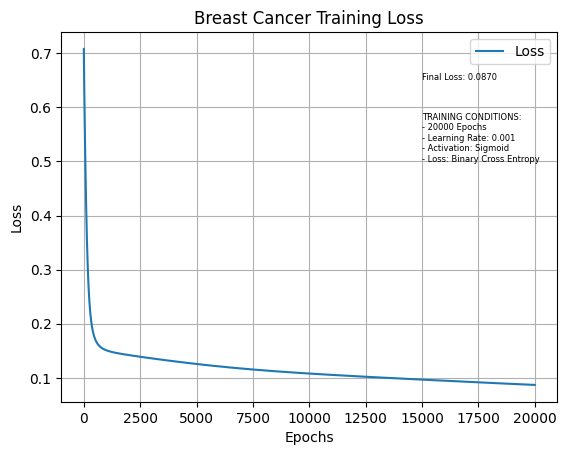

In [47]:
plt.plot(Epochs, Losses, label='Loss')
plt.text(15000, 0.65, 'Final Loss: {:.4f}'.format(Losses[-1]), fontsize=6)
plt.text(15000, 0.5, 'TRAINING CONDITIONS:\n- 20000 Epochs\n- Learning Rate: 0.001\n- Activation: Sigmoid\n- Loss: Binary Cross Entropy', fontsize=6)
plt.title('Breast Cancer Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('./images/breast_cancer_training_loss_sample_SigE20KLR0dot001BCE.png')
plt.show()


In [45]:
y_hat = predict(X_test, W, b, sigmoid)
print(y_hat)

[[1.26230314e-01 9.99976325e-01 9.99449026e-01 4.35681106e-04
  8.17424825e-04 9.99895500e-01 9.99989562e-01 9.91337107e-01
  7.07157756e-01 1.99708303e-03 3.72792292e-03 9.98299295e-01
  4.02797216e-03 8.85639707e-01 6.29380906e-03 9.95465068e-01
  7.65193641e-03 2.07317107e-04 1.88560613e-04 9.99975973e-01
  4.64332795e-01 3.18967714e-03 9.99968283e-01 4.22535224e-04
  5.02577035e-04 6.18008248e-03 4.53631118e-03 1.63792113e-03
  1.63670777e-03 9.99918661e-01 8.19403056e-04 1.63620376e-03
  1.50082929e-02 2.98977079e-02 6.15696931e-04 3.93082961e-03
  8.86902659e-01 4.06212987e-02 9.99945474e-01 1.09847686e-02
  5.28313996e-04 9.99101541e-01 7.55971296e-03 1.82761788e-03
  6.30691410e-02 8.77680968e-03 1.04057804e-03 1.36769192e-03
  3.31852842e-03 1.23383719e-02 9.99914387e-01 9.99974805e-01
  1.09532921e-02 4.85556723e-02 6.13586068e-04 2.47384596e-02
  4.49163292e-03 9.99977030e-01 9.75732374e-01 2.24551031e-03
  3.07498170e-03 9.99976694e-01 9.99985715e-01 2.68288655e-03
  6.7453

In [53]:
y_pred_train = (predict(X_train, W, b, sigmoid) > 0.5).astype(int)
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Accuracy on the training dataset: {accuracy_train * 100:.2f}%")

y_pred_test = (y_hat > 0.5).astype(int)
accuracy = np.mean(y_pred_test == y_test)
print(f"Accuracy on the testing dataset: {accuracy * 100:.2f}%")

Accuracy on the training dataset: 96.48%
Accuracy on the testing dataset: 98.25%


In [54]:
y_pred_flat = y_pred_test.flatten()

# Combine predicted values with target values
results = np.vstack((y_test.flatten(), y_pred_flat)).T  # Stack them row-wise and transpose

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Target", "Predicted"])

# Display the first few rows of the results
pd.set_option('display.max_rows', None) 
print(results_df)

     Target  Predicted
0         0          0
1         1          1
2         1          1
3         0          0
4         0          0
5         1          1
6         1          1
7         1          1
8         0          1
9         0          0
10        0          0
11        1          1
12        0          0
13        1          1
14        0          0
15        1          1
16        0          0
17        0          0
18        0          0
19        1          1
20        1          0
21        0          0
22        1          1
23        0          0
24        0          0
25        0          0
26        0          0
27        0          0
28        0          0
29        1          1
30        0          0
31        0          0
32        0          0
33        0          0
34        0          0
35        0          0
36        1          1
37        0          0
38        1          1
39        0          0
40        0          0
41        1          1
42        0

In [55]:
pd.reset_option('display.max_rows')

We can see that the target values 8 and 20 were wrongly predicted. Out of curiosity, we could check the values of the features for these samples. We can plot the values of the features for these samples to see if they are outliers.